TESTS ON THE SOLAR WIND PART OF THE CODE.

In [8]:
import os
import scipy.io as sio
from scipy.io import readsav
from scipy.optimize import curve_fit
import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib widget
import Star 
import Planet 

In [9]:
from calc_tools import *
from dynamo import *
from magneticmoment import *
from solarwindmodel import *

Constants for Jupiter and the Sun

In [10]:
MS=1.989e30 #kg
RS=6.96342e8 #m
AS=4.6e9 #yo
BSsw= 1 #T
LS=3.826e26 #W


sol=Star('Sun', MS, RS, AS, BSsw,LS)

MJ=1.8986e27 #kg
#RJ=69911e3   #m
RJ=71492e3
wJ=1.77e-4   #s-1
LJ_norm=1.31e-9
dJ=5.2*149597870700

jup=Planet('Jupiter', MJ, RJ, wJ,wJ,LJ_norm,dJ)


sol.affiche()
jup.affiche()

Name :  Sun
Mass :  1.989e+30  MS
Radius :  696342000.0  RS
Age :  4600000000.0  yS
SW magnetic field  1 BswS
Luminosity :  3.826e+26 LS
Name :  Jupiter
Mass :  1.8986e+27  kg
Radius :  71492000.0  m
Rotation rate :  0.000177  s-1
Orbital period :  0.000177 s-1
Luminosity :  1.31e-09 W
Distance to host star :  777908927640.0 m
Radius of the magnetosphere :  0.5 m


In order to estimate the power of the emissions, we need to estimate the velocity and the density of stellar wind at the planet, then derive the intensity of the magnetic field carried by the SW.

We test the Parker model for the solar wind velocity for several type of stars with the following parameters : 
- G-type star : M=Msun, R=Rsun ;
- K/M-type star : M=0.5*Msun, R=0.46*Rsun

We computed the values of the velocity and the density for several distances and ages of the stars always adjusting the corona temperature such as that 1UA, v=425km/s.
We find Tcorona=0.81e6 K for G-type stars and Tcorona= for K/M-type stars.

- G-type star, 
- - t=4.6 Gyr, Tcorona = 0.81e6 K
- - t=1 Gyr, Tcorona= 2.09e6 K
- - t=0.7 Gyr, Tcorona= 2.61e6 K

In [11]:
(1e6*4.6e9)/(4.6e9+1e9)

821428.5714285715

In [15]:
vo=3397e3 #m/s 
no=1.6e10 #m-3
dua=1.49597870700e11 #m
G=6.6725985e-11 #N.m^2/kg^2

test_planet=Planet('planet_test',1.0,1.0,1.0,1.0,1.0,0.05*dua)
star_test=Star('star_test', 1.989e30,1.0,4.6e9,1.0,1.0)
v,veff,n,Tcor=parker(test_planet,star_test)
vorb=sqrt(G*star_test.mass/(0.05*dua))
print(v/1e3, veff/1e3, vorb/1e3, T/1e6)

164.54970753192706 211.70712034718733 133.20397350250377 0.8124285714285715


- - v(d), n(d) à t=4.6 Gyr

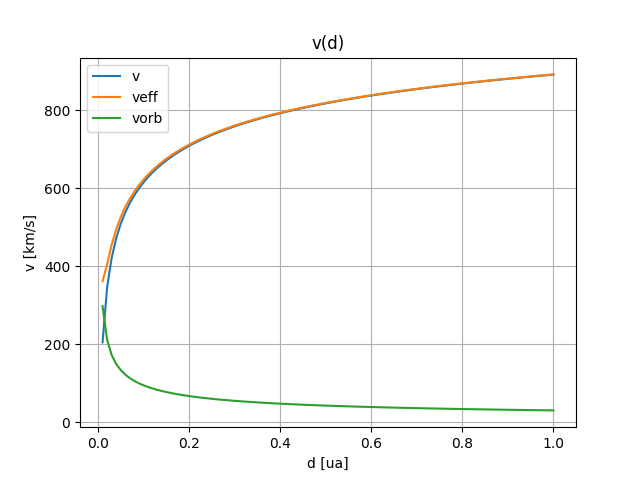

In [17]:
list_dist=np.linspace(0.01,1,100)
vd=np.zeros(100) ; nd=np.zeros(100) 
veffd=np.zeros(100) ; vorb=np.zeros(100) ; Tcor=np.zeros(100)

for i in range(0,len(list_dist)):
    test_planet=Planet('planet_test',1.0,1.0,1.0,1.0,1.0,list_dist[i]*dua)
    star_test=Star('star_test', 1.989e30,1.0,0.7e9,1.0,1.0)
    vd[i],veffd[i],nd[i],Tcor[i]=parker(test_planet,star_test)
    vorb[i]=sqrt(G*star_test.mass/(list_dist[i]*dua))

plt.figure()
plt.plot(list_dist,vd/1e3, label='v')
plt.plot(list_dist,veffd/1e3, label='veff')
plt.plot(list_dist, vorb/1e3, label='vorb')
plt.title("v(d)")
plt.xlabel('d [ua]')
plt.ylabel("v [km/s]")
plt.legend()
plt.grid()
plt.show()


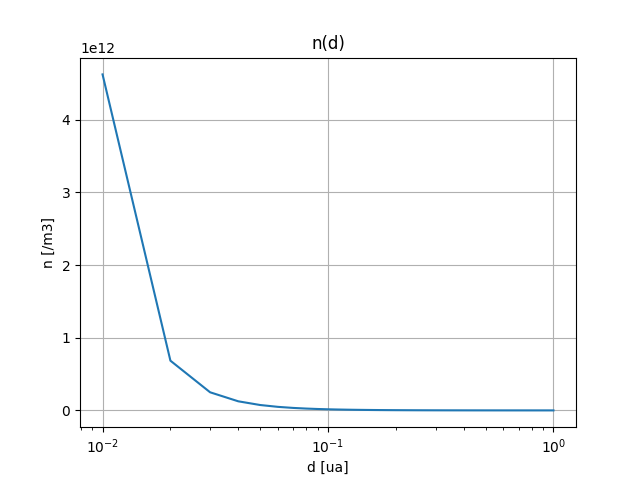

In [18]:
plt.figure()
plt.plot(list_dist,nd)
plt.title('n(d)')
plt.xlabel('d [ua]')
plt.ylabel('n [/m3]')
plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.show()


- - v(t) and n(t) at 1 UA

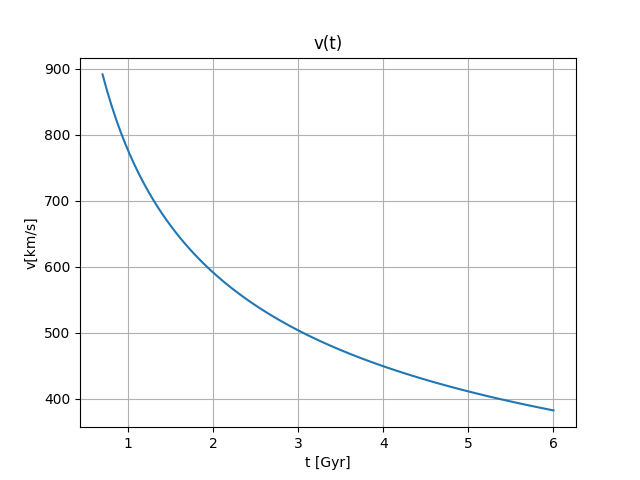

In [19]:
list_time=np.linspace(0.7, 6, 100)*1e9
vt=np.zeros(100) ; nt=np.zeros(100)
tau=2.56e7 #yr

for i in range(0,100):
    vt[i]=vo/pow((1+(list_time[i]/tau)),0.4)
    nt[i]=no/pow((1+(list_time[i]/tau)),1.5)

plt.figure()
plt.plot(list_time/1e9,vt/1e3)
plt.xlabel('t [Gyr]')
plt.ylabel( 'v[km/s]')
plt.title('v(t)')
plt.grid()


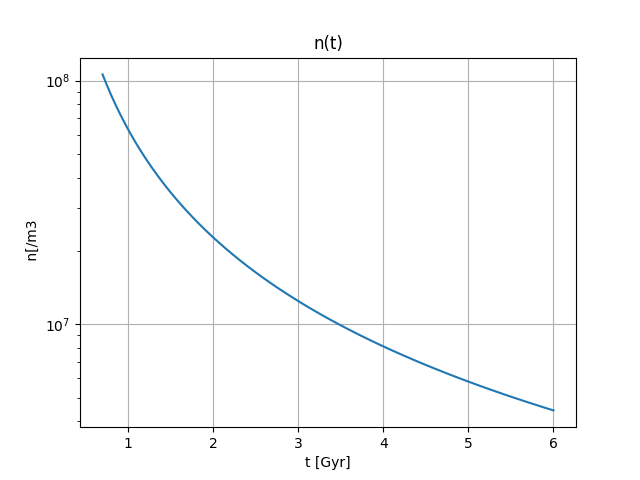

In [20]:
plt.figure()
plt.plot(list_time/1e9,nt)
plt.xlabel('t [Gyr]')
plt.ylabel( ' n[/m3')
plt.title('n(t)')
plt.yscale('log')
plt.grid()

In [21]:
print(vt[6],vt[0],vt[73])
print(nt[6],nt[0],nt[73])

769917.2247918784 891482.0916665593 424640.1820582957
61189487.60571651 106031283.74596688 6570384.110975571


- K/M-type stars : 
- - t=4.6 Gyr, Tcorona=0.695e6 K
- - t=1 Gyr, Tcorona=1.84e6 K
- - t=0.7 Gyr, Tcorona=2.31e6 K

In [23]:
vo=3397e3 #m/s 
no=1.6e10 #m-3
dua=1.49597870700e11 #m

test_planet=Planet('planet_test',1.0,1.0,1.0,1.0,1.0,0.05*dua)
star_test=Star('star_test', 0.5*1.989e30,0.46,1e9,1.0,1.0)
v,veff,n,Tcor=parker(test_planet,star_test)

print(v,veff,n)


472332.29040677805 481632.0606431228 8776902107.671482


- Test of the function computing the appropriate Tcorona for any case. We adjust the temperature by steps of 0.005e6 K until the velocity is in the range of vsun +/- 2 km/s. Then we adjust the temperature more precisely by steps of 0.001e6 K until the velocity is in the range Vsun +/- 0.5 km/s. We note that it takes about 50s to compute 10000 values. 

In [24]:
list_time=np.linspace(0.7, 6, 100)*1e9
list_mass=np.linspace(0.1,2,100)*1.989e30
T=np.zeros(shape=[100,100])

for i in range(0,100):
    for j in range(0,100):
        T[j][i]=calc_temperature(list_mass[j],list_time[i])

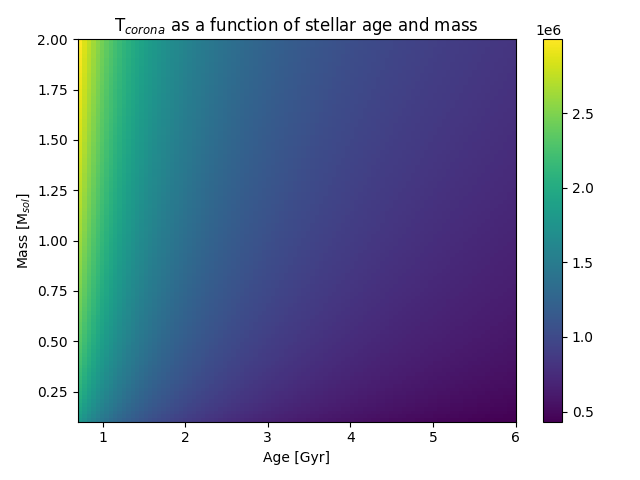

In [25]:
plt.figure()
ax1=plt.gca()
im1=ax1.imshow(T,origin='lower',aspect='auto', extent=[list_time[0]/1e9,list_time[99]/1e9,list_mass[0]/1.989e30,list_mass[99]/1.989e30],cmap='viridis')
plt.xlabel('Age [Gyr]')
plt.ylabel('Mass [M$_{sol}$]')
plt.title('T$_{corona}$ as a function of stellar age and mass')
cb1=plt.colorbar(im1, ax=ax1)
plt.tight_layout()
plt.show()

- Test of the Parker model for the velocity.

- - As a function of stellar age and mass, R=1Rsol and d=1UA.

In [27]:
list_time=np.linspace(0.7, 6, 100)*1e9
list_mass=np.linspace(0.1,2,100)*1.989e30
v1=np.zeros(shape=[100,100])
veff1=np.zeros(shape=[100,100])
n1=np.zeros(shape=[100,100])
T1=np.zeros(shape=[100,100])

for i in range(0,100):
    for j in range(0,100):
        planet1=Planet('pla_test',1.0,1.0,1.0,1.0,1.0,dua)
        star1=Star('star_test',list_mass[j],1.0,list_time[i],1.0,1.0)
        v1[j][i],veff1[j][i],n1[j][i],T1[j][i]=parker(planet1,star1)

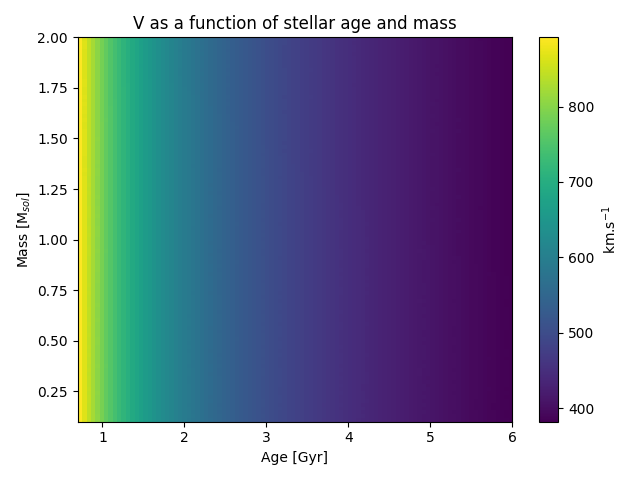

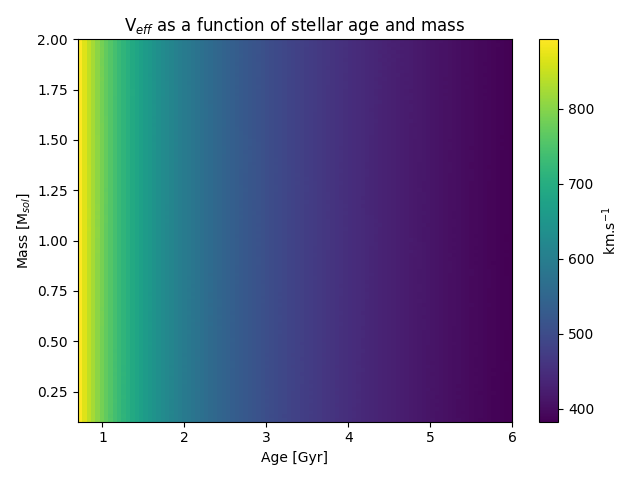

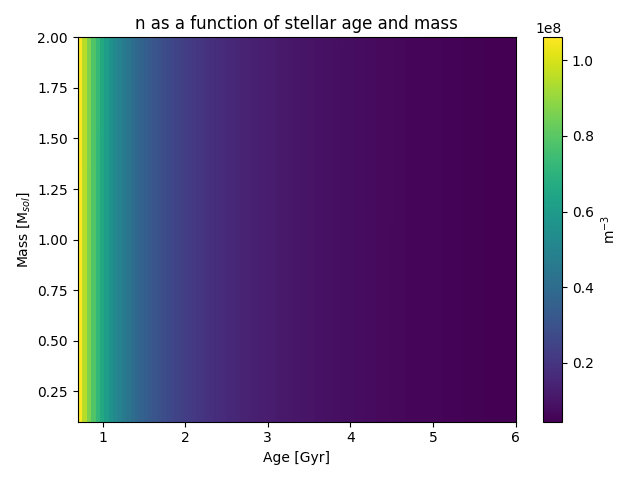

In [28]:
plt.figure()
ax1=plt.gca()
im1=ax1.imshow(v1/1e3,origin='lower',aspect='auto', extent=[list_time[0]/1e9,list_time[99]/1e9,list_mass[0]/1.989e30,list_mass[99]/1.989e30],cmap='viridis')
plt.xlabel('Age [Gyr]')
plt.ylabel('Mass [M$_{sol}$]')
plt.title('V as a function of stellar age and mass')
cb1=plt.colorbar(im1, ax=ax1)
cb1.set_label('km.s$^{-1}$')
plt.tight_layout()
plt.show()

plt.figure()
ax2=plt.gca()
im2=ax2.imshow(veff1/1e3,origin='lower',aspect='auto', extent=[list_time[0]/1e9,list_time[99]/1e9,list_mass[0]/1.989e30,list_mass[99]/1.989e30],cmap='viridis')
plt.xlabel('Age [Gyr]')
plt.ylabel('Mass [M$_{sol}$]')
plt.title('V$_{eff}$ as a function of stellar age and mass')
cb2=plt.colorbar(im2, ax=ax2)
cb2.set_label('km.s$^{-1}$')
plt.tight_layout()
plt.show()

plt.figure()
ax3=plt.gca()
im3=ax3.imshow(n1,origin='lower',aspect='auto', extent=[list_time[0]/1e9,list_time[99]/1e9,list_mass[0]/1.989e30,list_mass[99]/1.989e30],cmap='viridis')
plt.xlabel('Age [Gyr]')
plt.ylabel('Mass [M$_{sol}$]')
plt.title('n as a function of stellar age and mass')
cb3=plt.colorbar(im3, ax=ax3)
cb3.set_label('m$^{-3}$')
plt.tight_layout()
plt.show()

- - As a function of stellar age and star-planet distance, R=1Rsol, M=1Msol

In [29]:
list_time=np.linspace(0.7, 6, 100)*1e9
list_dist=np.linspace(0.01,1,100)
v2=np.zeros(shape=[100,100])
veff2=np.zeros(shape=[100,100])
n2=np.zeros(shape=[100,100])
T2=np.zeros(shape=[100,100])

for i in range(0,100):
    for j in range(0,100):
        planet1=Planet('pla_test',1.0,1.0,1.0,1.0,1.0,list_dist[j]*dua)
        star1=Star('star_test',1.989e30,1.0,list_time[i],1.0,1.0)
        v2[j][i],veff2[j][i],n2[j][i],T2[j][i]=parker(planet1,star1)

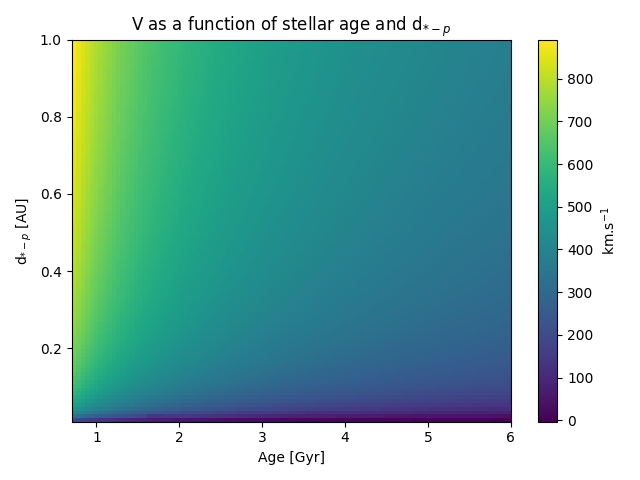

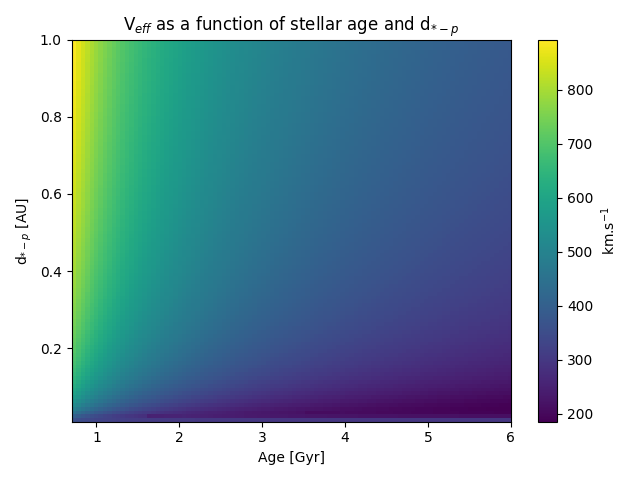

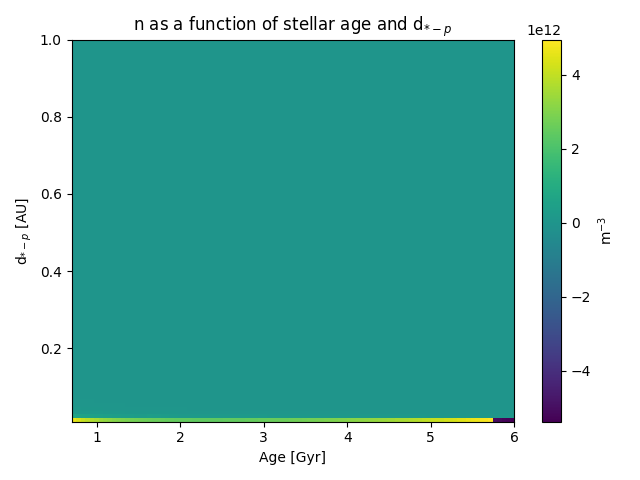

In [30]:
plt.figure()
ax1=plt.gca()
im1=ax1.imshow(v2/1e3,origin='lower',aspect='auto', extent=[list_time[0]/1e9,list_time[99]/1e9,list_dist[0],list_dist[99]],cmap='viridis')
plt.xlabel('Age [Gyr]')
plt.ylabel('d$_{*-p}$ [AU]')
plt.title('V as a function of stellar age and d$_{*-p}$')
cb1=plt.colorbar(im1, ax=ax1)
cb1.set_label('km.s$^{-1}$')
plt.tight_layout()
plt.show()

plt.figure()
ax2=plt.gca()
im2=ax2.imshow(veff2/1e3,origin='lower',aspect='auto', extent=[list_time[0]/1e9,list_time[99]/1e9,list_dist[0],list_dist[99]],cmap='viridis')
plt.xlabel('Age [Gyr]')
plt.ylabel('d$_{*-p}$ [AU]')
plt.title('V$_{eff}$ as a function of stellar age and d$_{*-p}$')
cb2=plt.colorbar(im2, ax=ax2)
cb2.set_label('km.s$^{-1}$')
plt.tight_layout()
plt.show()

plt.figure()
ax3=plt.gca()
im3=ax3.imshow(n2,origin='lower',aspect='auto', extent=[list_time[0]/1e9,list_time[99]/1e9,list_dist[0],list_dist[99]],cmap='viridis')
plt.xlabel('Age [Gyr]')
plt.ylabel('d$_{*-p}$ [AU]')
plt.title('n as a function of stellar age and d$_{*-p}$')
cb3=plt.colorbar(im3, ax=ax3)
cb3.set_label('m$^{-3}$')
plt.tight_layout()
plt.show()

- Taking into account the coronal mass ejection (CME) contribution to the stelar wind.
We can expect CME collisions for close-in exoplanets. See Khodachenko et al,2006 :  they made an estimation of the dependence of the average n_cme and v_cme with respect to the substellar distance. They also show that individual CME's have very different speed but the average CME velocity is almost independant of the substellar distance : v_cme=5.26e5 m/s.


In [32]:
vo=3397e3 #m/s 
no=1.6e10 #m-3
dua=1.49597870700e11 #m
G=6.6725985e-11 #N.m^2/kg^2

test_planet=Planet('planet_test',1.0,1.0,1.0,1.0,1.0,1*dua)
star_test=Star('star_test', 1.989e30,1.0,4.6e9,1.0,1.0)
v,veff,n,Tcor=parker(test_planet,star_test)
vcme,veff_cme,ns_cme, T_cme=CME(star_test,test_planet)
vorb=sqrt(G*star_test.mass/(0.2*dua))
print(v/1e3, veff/1e3, n,Tcor/1e6)
print(vcme/1e3, veff_cme/1e3, ns_cme, T_cme/1e6)

425.33791155484585 426.3795303877529 6581396.016694565 0.8124285714285715
526.0 526.8426377276642 7100000.0 2.0
